In [7]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import keras as k
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
batch=10
img_size=200

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.3,
        rotation_range=40)
#train generator generates 10 images at a time
train_generator = train_datagen.flow_from_directory(
        'data/',  # this is the target directory
        target_size=(200, 200),
        batch_size=batch,
        color_mode='grayscale',
        class_mode='categorical',
        save_to_dir='augmented/')

Found 480 images belonging to 4 classes.


In [3]:
model = Sequential()
model.add(Conv2D(50, (3, 3), input_shape=(200, 200,1),activation='relu'))
model.add(Conv2D(100, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3),activation='relu'))
model.add(Conv2D(200, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 50)      500       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 100)     45100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 100)       90100     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 200)       180200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 200)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 441800)            0         
__________

In [4]:
total=200
val_total=total*0.2
graph=keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=1,
                            write_graph=True, write_images=True)

In [6]:
#steps per epoch, how many times to generate images i.e 200 steps of 10 batches
h=model.fit_generator(
        train_generator,
        steps_per_epoch=total,
        epochs=10,
        validation_data=train_generator,
        validation_steps=val_total,callbacks=[graph])
model.save('gesturecnn.h5')

Epoch 1/10
200/200 [==============================] - 2360s - loss: 0.8554 - acc: 0.6630 - val_loss: 0.5946 - val_acc: 0.7925
Epoch 2/10
200/200 [==============================] - 2283s - loss: 0.6027 - acc: 0.7880 - val_loss: 0.3930 - val_acc: 0.8750
Epoch 3/10
200/200 [==============================] - 2114s - loss: 0.4437 - acc: 0.8515 - val_loss: 0.2429 - val_acc: 0.9100
Epoch 4/10
200/200 [==============================] - 2116s - loss: 0.3550 - acc: 0.8895 - val_loss: 0.2145 - val_acc: 0.9250
Epoch 5/10
200/200 [==============================] - 2104s - loss: 0.3028 - acc: 0.9075 - val_loss: 0.1611 - val_acc: 0.9475
Epoch 6/10
200/200 [==============================] - 2103s - loss: 0.2221 - acc: 0.9275 - val_loss: 0.0838 - val_acc: 0.9700
Epoch 7/10
200/200 [==============================] - 2105s - loss: 0.2098 - acc: 0.9305 - val_loss: 0.0716 - val_acc: 0.9750
Epoch 8/10
200/200 [==============================] - 2100s - loss: 0.1628 - acc: 0.9495 - val_loss: 0.0915 - val_acc:

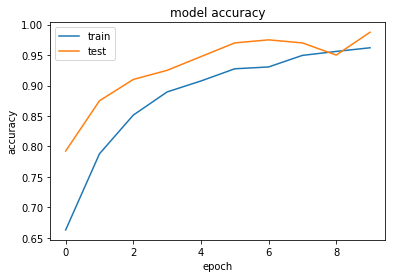

In [10]:
# summarize history for accuracy
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

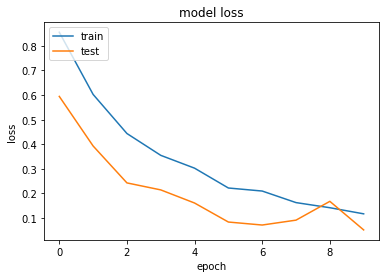

In [11]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')